                                Mini Project 9- Online_fraud_detection_classification


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from tabulate import tabulate
import random
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =pd.read_csv("onlinefraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df.drop('isFlaggedFraud', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

No missing values found

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000
mean,243.397,179861.904,833883.104,855113.669,1100701.667,1224996.398,0.001
std,142.332,603858.231,2888242.673,2924048.503,3399180.113,3674128.942,0.036
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,156.000,13389.570,0.000,0.000,0.000,0.000,0.000
50%,239.000,74871.940,14208.000,0.000,132705.665,214661.440,0.000
75%,335.000,208721.478,107315.175,144258.410,943036.708,1111909.250,0.000
max,743.000,92445516.640,59585040.370,49585040.370,356015889.350,356179278.920,1.000


In [8]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 0
Float variables: 5


<Axes: xlabel='type', ylabel='count'>

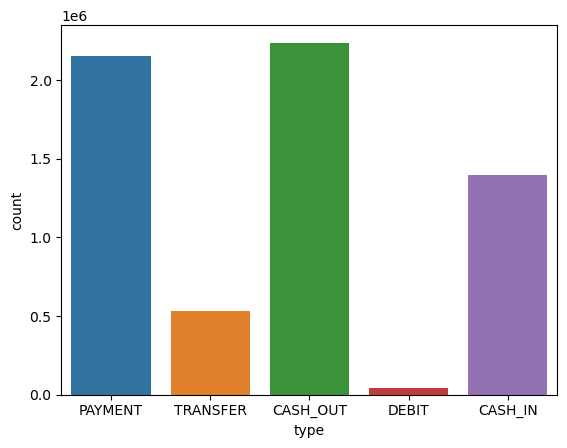

In [9]:
#count plot of the Payment type column 
sns.countplot(x='type', data=df)


<Axes: xlabel='type', ylabel='amount'>

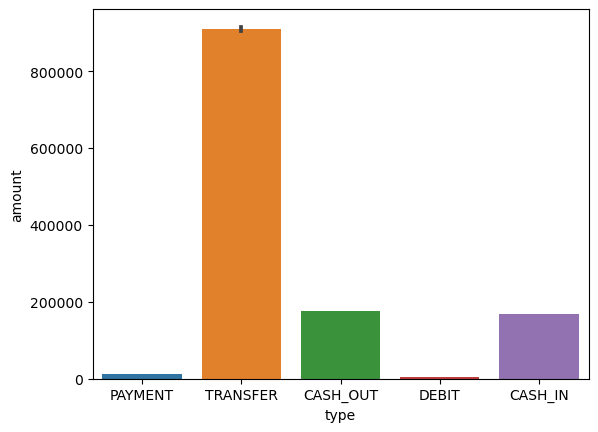

In [10]:
# Bar Plot
sns.barplot(x='type', y='amount', data=df)

The graphs clearly indicate that the 'cash_out' and 'transfer' types are predominant both in count and amount.

In [11]:
#distribution of data among both the prediction values
df['isFraud'].value_counts()


0    6354407
1       8213
Name: isFraud, dtype: int64

There is an issue of class imbalance.

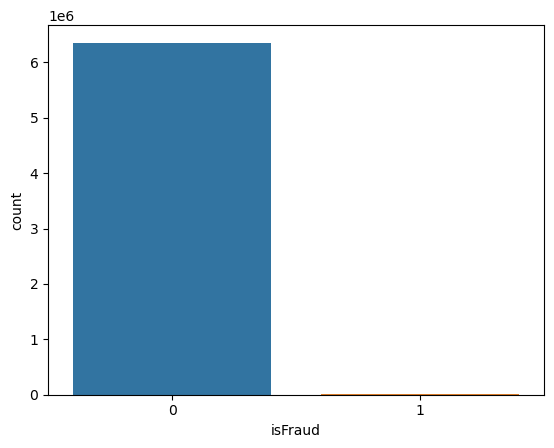

In [12]:
sns.countplot(x='isFraud', data=df)
plt.show()

There are much more non-fraudulent transactions than fraudulent transactions.

In [13]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000,0.022,-0.010,-0.010,0.028,0.026,0.032
amount,0.022,1.000,-0.003,-0.008,0.294,0.459,0.077
oldbalanceOrg,-0.010,-0.003,1.000,0.999,0.066,0.042,0.010
newbalanceOrig,-0.010,-0.008,0.999,1.000,0.068,0.042,-0.008
oldbalanceDest,0.028,0.294,0.066,0.068,1.000,0.977,-0.006
newbalanceDest,0.026,0.459,0.042,0.042,0.977,1.000,0.001
isFraud,0.032,0.077,0.010,-0.008,-0.006,0.001,1.000


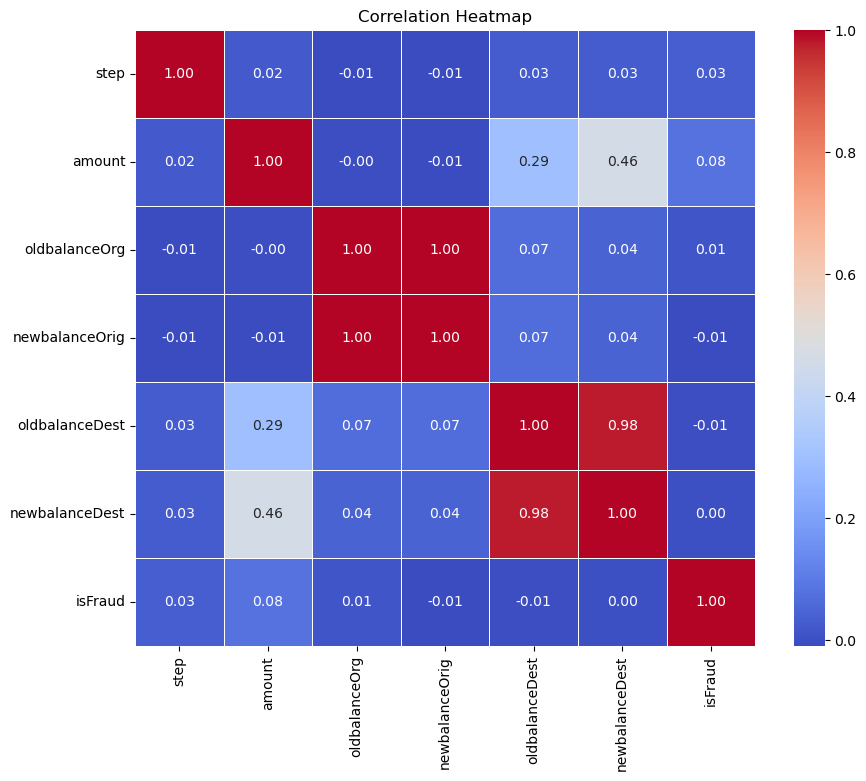

In [14]:
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Correlation')

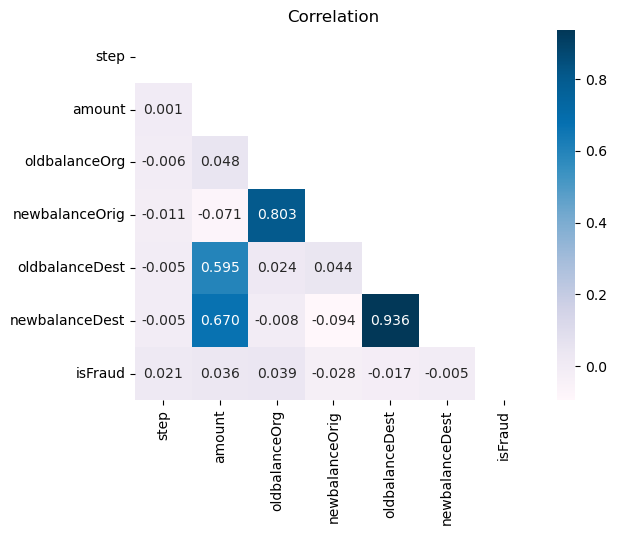

In [15]:
corr_matrix = df.corr('spearman')
sns.heatmap(corr_matrix, cbar=True, annot=True, mask = np.triu(np.ones_like(corr_matrix, dtype = bool)), fmt='.3f', cmap='PuBu')
plt.title('Correlation')

oldbalanceOrg and newbalanceOrig has strong positive relationship.

oldbalanceDest and newbalanceDest has strong positive relationship.

oldbalanceOrg and amount has weak positive relationship.

newbalanceOrig and amount has moderate positive relationship.

In [16]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

Data Preprocessing: 

This includes the following steps: 

Encoding of Type column

Dropping irrelevant columns like nameOrig, nameDest

Data Splitting

In [17]:
# Data Preprocessing
type_new = pd.get_dummies(df['type'], drop_first=True)
df_new = pd.concat([df, type_new], axis=1)
df_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0,0,1,0
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0,0,1,0
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0,0,0,1
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,1,0,0,0
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0,0,1,0


In [18]:
# Dropping irrelevant columns
X = df_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)  
y = df_new['isFraud']


In [19]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (5090096, 10)
Shape of X_test: (1272524, 10)
Shape of y_train: (5090096,)
Shape of y_test: (1272524,)


In [20]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)


# Model building

Due to the large dataset,   Logistic Regression wiil be used to identify online payment fraud.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 1. Logistic Regression

In [22]:

lr_classifier = LogisticRegression(random_state=42)

lr_classifier.fit(X_train_scaled, y_train)

lr_predictions = lr_classifier.predict(X_test_scaled)


In [23]:
# Evaluate performance
print("\nLogistic Regression Classifier:")
print("Accuracy Score:", accuracy_score(y_test, lr_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))



Logistic Regression Classifier:
Accuracy Score: 0.9991850841320085
Confusion Matrix:
 [[1270856      48]
 [    989     631]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.93      0.39      0.55      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.69      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524



Even though the model has slightly higher precision, recall for the minority class is very low

# 2. XGBoost

In [24]:
xgb_classifier = XGBClassifier(random_state=42)

xgb_classifier.fit(X_train_scaled, y_train)

xgb_predictions = xgb_classifier.predict(X_test_scaled)

# Evaluate performance
print("\nXGBoost Classifier:")
print("Accuracy Score:", accuracy_score(y_test, xgb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))
print("Classification Report:\n", classification_report(y_test, xgb_predictions))



XGBoost Classifier:
Accuracy Score: 0.9997846798960177
Confusion Matrix:
 [[1270840      64]
 [    210    1410]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.87      0.91      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.94      0.96   1272524
weighted avg       1.00      1.00      1.00   1272524



The precision and recall both are better than logistic regression

# 3. Decision Tree

In [25]:
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train_scaled, y_train)

dt_predictions = dt_classifier.predict(X_test_scaled)

# Evaluate performance
print("\nDecision Tree Classifier:")
print("Accuracy Score:", accuracy_score(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))



Decision Tree Classifier:
Accuracy Score: 0.9997178835133954
Confusion Matrix:
 [[1270741     163]
 [    196    1424]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.88      0.89      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



The model is better than logistic regression but in terms of accuracy, precision and recall score, XGBoost performs better.

# 4. Naive Bayes

In [26]:
nb_classifier = GaussianNB()

nb_classifier.fit(X_train_scaled, y_train)

nb_predictions = nb_classifier.predict(X_test_scaled)

# Evaluate performance
print("\nNaive Bayes Classifier:")
print("Accuracy Score:", accuracy_score(y_test, nb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_predictions))
print("Classification Report:\n", classification_report(y_test, nb_predictions))



Naive Bayes Classifier:
Accuracy Score: 0.35715554284241396
Confusion Matrix:
 [[452869 818035]
 [     0   1620]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.36      0.53   1270904
           1       0.00      1.00      0.00      1620

    accuracy                           0.36   1272524
   macro avg       0.50      0.68      0.26   1272524
weighted avg       1.00      0.36      0.52   1272524



The performance is very poor.

In [27]:
# Defining the results
results = {
    "Model": ["Logistic Regression", "XGBoost", "Decision Tree", "Naive Bayes"],
    "Accuracy Score": [0.9991850841320085, 0.9997846798960177, 0.9997178835133954, 0.35715554284241396],
    "Precision": [0.93, 0.96, 0.90, 0.00],  
    "Recall": [0.39, 0.87, 0.88, 1.00],  
    "F1-score": [0.55, 0.91, 0.89, 0.00]  
}

# Creating DataFrame
results_df = pd.DataFrame(results)

print(results_df)


                 Model  Accuracy Score  Precision  Recall  F1-score
0  Logistic Regression           0.999      0.930   0.390     0.550
1              XGBoost           1.000      0.960   0.870     0.910
2        Decision Tree           1.000      0.900   0.880     0.890
3          Naive Bayes           0.357      0.000   1.000     0.000


Report: 

Based on the above results, it is evident that the XGBoost model outperforms the other models in terms of accuracy, precision, recall, and F1-score. Therefore, the XGBoost model is recommended for identifying online payment fraud in this dataset.

The accuracy achieved by the model is satisfactory, and hyperparameter tuning may not be necessary. 

Note:

The runtime for the Support Vector Machine (SVM), Random Forest, and K-Nearest Neighbors (KNN) models was exceptionally high, leading to their exclusion from further consideration. This prolonged runtime can be attributed to the high dimensionality of the dataset, which significantly increased the computational complexity of these algorithms. Consequently, in order to maintain efficiency and expedite model selection, these models were not pursued further in the analysis.

Further Recommendations:

Dimensionality Reduction Techniques: We can consider employing dimensionality reduction techniques such as Principal Component Analysis (PCA) to reduce the number of features and alleviate computational burden without sacrificing model performance.


Hyperparameter Tuning: Although not feasible in this dataset due to time constraints, hyperparameter tuning could potentially improve the performance of selected models. Grid search or random search techniques can be employed to systematically search through the hyperparameter space and identify optimal parameter configurations.


Model Ensemble: Model ensemble techniques such as bagging and boosting may be employed. 


By implementing these recommendations, we can enhance the efficiency and effectiveness of our fraud detection system while mitigating the challenges associated with high-dimensional datasets and computational complexity.



# 